# Proyecto de Machine Learning: Detección de Phishing en URLs

**Autor:** Alessandro Ledesma  
**Fecha:** Junio 2025  
**Dataset:** Phiusiil Phishing URL Website (UCI ML Repository ID: 967)

## Objetivo del Proyecto
Este proyecto tiene como objetivo implementar y comparar modelos de machine learning para la detección automática de sitios web de phishing utilizando características extraídas de URLs. Se implementarán dos modelos de clasificación:

1. **CatBoost Classifier** - Modelo de gradient boosting optimizado para datos categóricos
2. **Extra Trees Classifier** - Ensemble de árboles de decisión extremadamente aleatorios

## Metodología
1. Carga y exploración del dataset
2. Análisis exploratorio de datos (EDA)
3. Preprocesamiento y limpieza de datos
4. Selección de características
5. Entrenamiento y optimización de modelos
6. Evaluación y comparación de resultados
7. Análisis de implicaciones éticas

## 1. Importación de Librerías

Importamos todas las librerías necesarias para el análisis de datos, modelado y visualización.

In [2]:
# Instalar paquetes necesarios
%pip install catboost ucimlrepo plotly -q
print("✅ Paquetes instalados correctamente")

Note: you may need to restart the kernel to use updated packages.
✅ Paquetes instalados correctamente


In [3]:
# Librerías para manejo de datos
import pandas as pd
import numpy as np

# Librerías para machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score, 
                           precision_score, recall_score, f1_score, roc_auc_score, roc_curve)

# CatBoost
from catboost import CatBoostClassifier

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Dataset de UCI
from ucimlrepo import fetch_ucirepo

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Configuración para reproducibilidad
np.random.seed(42)

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


## 2. Carga y Exploración Inicial del Dataset

### 2.1 Carga del Dataset
Utilizamos el repositorio UCI ML para cargar el dataset de detección de phishing.

In [4]:
# Cargar dataset desde UCI ML Repository
print("🔄 Cargando dataset de phishing...")

# Fetch dataset 
phiusiil_phishing_url_website = fetch_ucirepo(id=967) 

# Data (as pandas dataframes) 
X = phiusiil_phishing_url_website.data.features 
y = phiusiil_phishing_url_website.data.targets 

print("✅ Dataset cargado exitosamente")
print(f"📊 Forma del dataset: {X.shape}")
print(f"🎯 Variable objetivo: {y.columns.tolist()}")

🔄 Cargando dataset de phishing...
✅ Dataset cargado exitosamente
📊 Forma del dataset: (235795, 54)
🎯 Variable objetivo: ['label']
✅ Dataset cargado exitosamente
📊 Forma del dataset: (235795, 54)
🎯 Variable objetivo: ['label']


In [5]:
# Metadata del dataset
print("📋 METADATA DEL DATASET:")
print("=" * 50)
print(phiusiil_phishing_url_website.metadata)
print("\n")

📋 METADATA DEL DATASET:
{'uci_id': 967, 'name': 'PhiUSIIL Phishing URL (Website)', 'repository_url': 'https://archive.ics.uci.edu/dataset/967/phiusiil+phishing+url+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/967/data.csv', 'abstract': 'PhiUSIIL Phishing URL Dataset is a substantial dataset comprising 134,850 legitimate and 100,945 phishing URLs. Most of the URLs we analyzed, while constructing the dataset, are the latest URLs. Features are extracted from the source code of the webpage and URL. Features such as CharContinuationRate, URLTitleMatchScore, URLCharProb, and TLDLegitimateProb are derived from existing features.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 235795, 'num_features': 54, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['label'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2024, 'las

In [6]:
# Variable information 
print("📊 INFORMACIÓN DE VARIABLES:")
print("=" * 50)
print(phiusiil_phishing_url_website.variables)
print("\n")

📊 INFORMACIÓN DE VARIABLES:
                          name     role         type demographic description  \
0                     FILENAME    Other  Categorical        None        None   
1                          URL  Feature  Categorical        None        None   
2                    URLLength  Feature      Integer        None        None   
3                       Domain  Feature  Categorical        None        None   
4                 DomainLength  Feature      Integer        None        None   
5                   IsDomainIP  Feature      Integer        None        None   
6                          TLD  Feature  Categorical        None        None   
7           URLSimilarityIndex  Feature      Integer        None        None   
8         CharContinuationRate  Feature      Integer        None        None   
9            TLDLegitimateProb  Feature   Continuous        None        None   
10                 URLCharProb  Feature   Continuous        None        None   
11          

### 2.2 Análisis Exploratorio Inicial

In [7]:
# Exploración básica del dataset
print("🔍 EXPLORACIÓN BÁSICA DEL DATASET")
print("=" * 50)

# Información general
print(f"Número de muestras: {X.shape[0]:,}")
print(f"Número de características: {X.shape[1]}")
print(f"\nPrimeras 5 filas de características:")
print(X.head())

print(f"\nPrimeras 5 filas de variable objetivo:")
print(y.head())

# Información sobre tipos de datos
print(f"\n📈 INFORMACIÓN DE TIPOS DE DATOS:")
print(X.info())

# Distribución de la variable objetivo
print(f"\n🎯 DISTRIBUCIÓN DE LA VARIABLE OBJETIVO:")
print(y.value_counts())
print(f"\nPorcentaje de distribución:")
print(y.value_counts(normalize=True) * 100)

🔍 EXPLORACIÓN BÁSICA DEL DATASET
Número de muestras: 235,795
Número de características: 54

Primeras 5 filas de características:
                                  URL  URLLength                      Domain  \
0    https://www.southbankmosaics.com         31    www.southbankmosaics.com   
1            https://www.uni-mainz.de         23            www.uni-mainz.de   
2      https://www.voicefmradio.co.uk         29      www.voicefmradio.co.uk   
3         https://www.sfnmjournal.com         26         www.sfnmjournal.com   
4  https://www.rewildingargentina.org         33  www.rewildingargentina.org   

   DomainLength  IsDomainIP  TLD  URLSimilarityIndex  CharContinuationRate  \
0            24           0  com               100.0              1.000000   
1            16           0   de               100.0              0.666667   
2            22           0   uk               100.0              0.866667   
3            19           0  com               100.0              1.000000   


In [8]:
# Verificación de valores faltantes
print("🔍 VERIFICACIÓN DE VALORES FALTANTES:")
print("=" * 50)

# Valores faltantes en características
missing_features = X.isnull().sum()
print(f"Valores faltantes en características:")
print(f"Total: {missing_features.sum()}")
if missing_features.sum() > 0:
    print(missing_features[missing_features > 0])
else:
    print("✅ No hay valores faltantes en las características")

# Valores faltantes en variable objetivo
missing_target = y.isnull().sum()
print(f"\nValores faltantes en variable objetivo:")
print(f"Total: {missing_target.sum()}")
if missing_target.sum() > 0:
    print(missing_target[missing_target > 0])
else:
    print("✅ No hay valores faltantes en la variable objetivo")

🔍 VERIFICACIÓN DE VALORES FALTANTES:
Valores faltantes en características:
Total: 0
✅ No hay valores faltantes en las características

Valores faltantes en variable objetivo:
Total: 0
✅ No hay valores faltantes en la variable objetivo


### 2.3 Visualizaciones Exploratorias

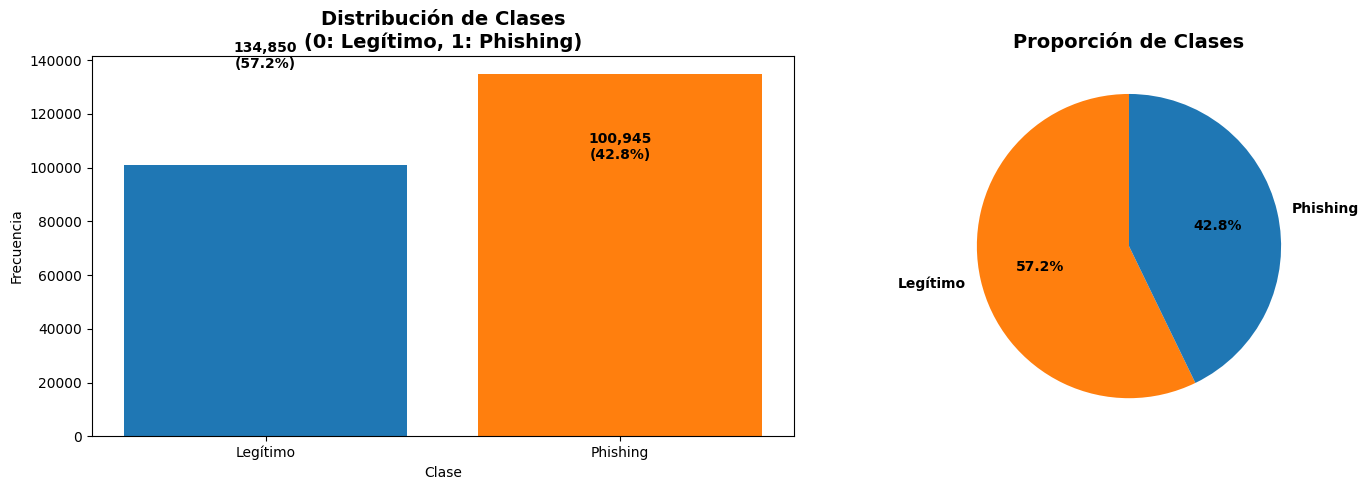


📊 RESUMEN ESTADÍSTICO DE CARACTERÍSTICAS NUMÉRICAS:
           URLLength   DomainLength     IsDomainIP  URLSimilarityIndex  \
count  235795.000000  235795.000000  235795.000000       235795.000000   
mean       34.573095      21.470396       0.002706           78.430778   
std        41.314153       9.150793       0.051946           28.976055   
min        13.000000       4.000000       0.000000            0.155574   
25%        23.000000      16.000000       0.000000           57.024793   
50%        27.000000      20.000000       0.000000          100.000000   
75%        34.000000      24.000000       0.000000          100.000000   
max      6097.000000     110.000000       1.000000          100.000000   

       CharContinuationRate  TLDLegitimateProb    URLCharProb      TLDLength  \
count         235795.000000      235795.000000  235795.000000  235795.000000   
mean               0.845508           0.260423       0.055747       2.764456   
std                0.216632           0.

In [9]:
# Visualización de la distribución de la variable objetivo
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico de barras
y_counts = y['label'].value_counts()
axes[0].bar(y_counts.index, y_counts.values, color=['#ff7f0e', '#1f77b4'])
axes[0].set_title('Distribución de Clases\n(0: Legítimo, 1: Phishing)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Clase')
axes[0].set_ylabel('Frecuencia')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Legítimo', 'Phishing'])

# Agregar valores en las barras
for i, v in enumerate(y_counts.values):
    axes[0].text(i, v + 1000, f'{v:,}\n({v/len(y)*100:.1f}%)', 
                ha='center', va='bottom', fontweight='bold')

# Gráfico de pastel
labels = ['Legítimo', 'Phishing']
colors = ['#ff7f0e', '#1f77b4']
axes[1].pie(y_counts.values, labels=labels, colors=colors, autopct='%1.1f%%', 
           startangle=90, textprops={'fontweight': 'bold'})
axes[1].set_title('Proporción de Clases', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Resumen estadístico de características numéricas
print("\n📊 RESUMEN ESTADÍSTICO DE CARACTERÍSTICAS NUMÉRICAS:")
print("=" * 60)
numeric_features = X.select_dtypes(include=[np.number])
print(numeric_features.describe())


🔥 ANÁLISIS DE CORRELACIÓN


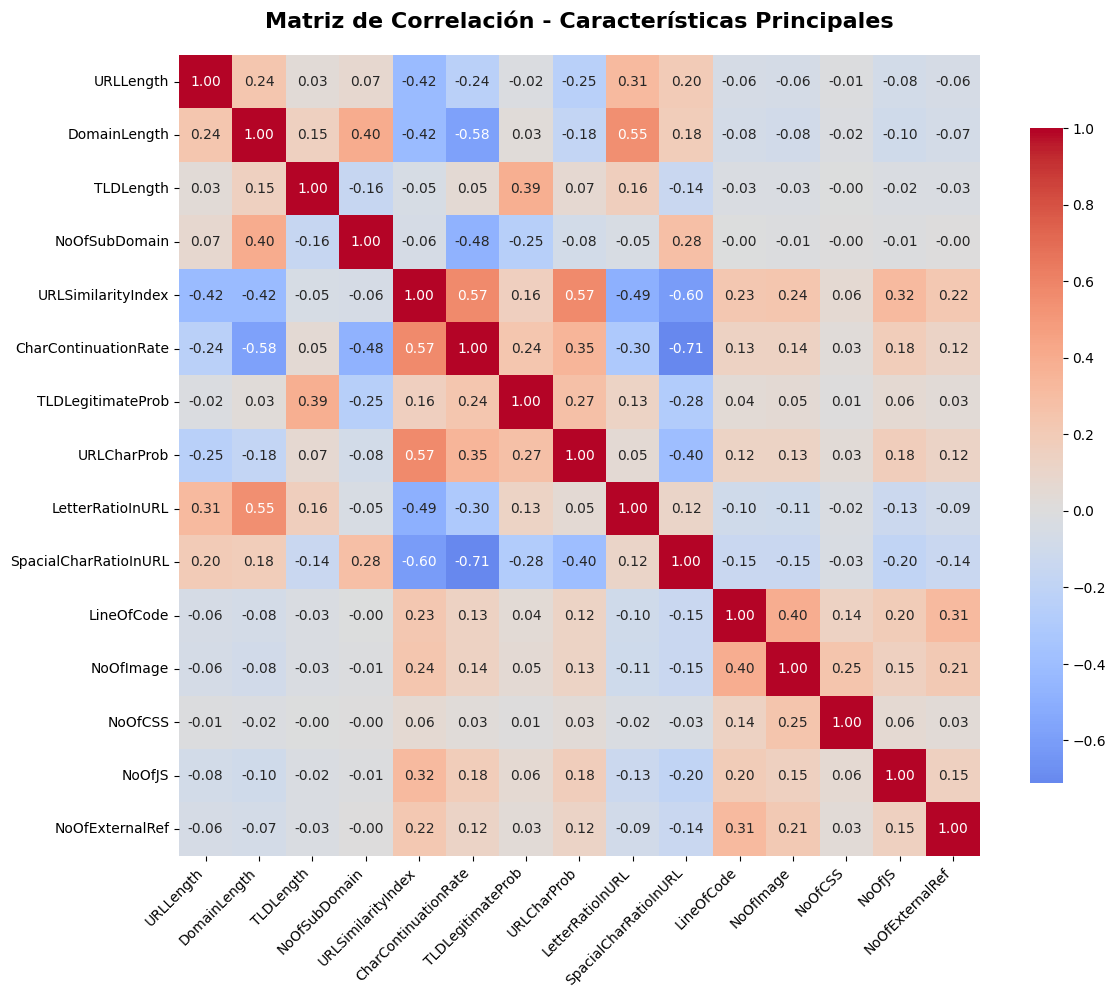


🔍 Correlaciones altas (>0.7):
  • CharContinuationRate - SpacialCharRatioInURL: -0.711


In [10]:
# Matriz de correlación de las principales características numéricas
print("\n🔥 ANÁLISIS DE CORRELACIÓN")
print("=" * 50)

# Seleccionar las características numéricas más importantes
important_features = [
    'URLLength', 'DomainLength', 'TLDLength', 'NoOfSubDomain',
    'URLSimilarityIndex', 'CharContinuationRate', 'TLDLegitimateProb',
    'URLCharProb', 'LetterRatioInURL', 'SpacialCharRatioInURL',
    'LineOfCode', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfExternalRef'
]

# Crear matriz de correlación
corr_matrix = X[important_features].corr()

# Visualización de la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
           square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Matriz de Correlación - Características Principales', 
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Identificar correlaciones altas
high_corr = np.where(np.abs(corr_matrix) > 0.7)
high_corr_pairs = [(corr_matrix.index[x], corr_matrix.columns[y], corr_matrix.iloc[x, y]) 
                   for x, y in zip(*high_corr) if x != y and x < y]

print(f"\n🔍 Correlaciones altas (>0.7):")
for feature1, feature2, corr_val in high_corr_pairs:
    print(f"  • {feature1} - {feature2}: {corr_val:.3f}")

## 3. Preprocesamiento de Datos

### 3.1 Preparación de Datos
Ahora vamos a preparar los datos para el entrenamiento de modelos. Esto incluye:
- Codificación de variables categóricas
- Separación de características numéricas y categóricas
- Preparación de conjuntos de entrenamiento y prueba

In [11]:
# Autor: Alessandro Ledesma
# Preprocesamiento de datos para modelos de ML

print("🔧 PREPROCESAMIENTO DE DATOS")
print("=" * 50)

# Identificar características categóricas y numéricas
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()

print(f"Características categóricas ({len(categorical_features)}): {categorical_features}")
print(f"Características numéricas ({len(numeric_features)}): {len(numeric_features)}")

# Crear una copia de los datos para el preprocesamiento
X_processed = X.copy()

# Codificar variables categóricas (excepto URL y Title que son muy específicas)
# Mantenemos URL, Domain, TLD ya que pueden ser útiles después del encoding
features_to_encode = ['TLD']  # Solo codificamos TLD por ahora

label_encoders = {}
for feature in features_to_encode:
    le = LabelEncoder()
    X_processed[feature + '_encoded'] = le.fit_transform(X_processed[feature])
    label_encoders[feature] = le
    print(f"  ✅ {feature} codificado: {len(le.classes_)} clases únicas")

# Eliminar características que no son útiles para el modelo
features_to_drop = ['URL', 'Domain', 'Title']  # Muy específicas y de alta cardinalidad
X_processed = X_processed.drop(columns=features_to_drop)

print(f"\n📊 Forma del dataset después del preprocesamiento: {X_processed.shape}")
print(f"Características finales: {X_processed.columns.tolist()}")

🔧 PREPROCESAMIENTO DE DATOS
Características categóricas (4): ['URL', 'Domain', 'TLD', 'Title']
Características numéricas (50): 50
  ✅ TLD codificado: 695 clases únicas

📊 Forma del dataset después del preprocesamiento: (235795, 52)
Características finales: ['URLLength', 'DomainLength', 'IsDomainIP', 'TLD', 'URLSimilarityIndex', 'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength', 'HasTitle', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 

In [12]:
# División del dataset en entrenamiento y prueba
print("\n🔀 DIVISIÓN DEL DATASET")
print("=" * 40)

# Preparar los datos finales
X_final = X_processed.select_dtypes(include=[np.number])  # Solo características numéricas
y_final = y['label'].values

print(f"Características finales para el modelo: {X_final.shape[1]}")
print(f"Muestras totales: {len(y_final):,}")

# División estratificada para mantener la proporción de clases
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_final
)

print(f"\n📊 Distribución después de la división:")
print(f"  • Entrenamiento: {X_train.shape[0]:,} muestras ({X_train.shape[0]/len(y_final)*100:.1f}%)")
print(f"  • Prueba: {X_test.shape[0]:,} muestras ({X_test.shape[0]/len(y_final)*100:.1f}%)")

# Verificar distribución de clases
train_dist = pd.Series(y_train).value_counts(normalize=True).sort_index()
test_dist = pd.Series(y_test).value_counts(normalize=True).sort_index()

print(f"\n🎯 Distribución de clases:")
print(f"  Entrenamiento - Legítimo: {train_dist[0]:.3f}, Phishing: {train_dist[1]:.3f}")
print(f"  Prueba - Legítimo: {test_dist[0]:.3f}, Phishing: {test_dist[1]:.3f}")

print("\n✅ Dataset preparado para entrenamiento de modelos")


🔀 DIVISIÓN DEL DATASET
Características finales para el modelo: 51
Muestras totales: 235,795

📊 Distribución después de la división:
  • Entrenamiento: 188,636 muestras (80.0%)
  • Prueba: 47,159 muestras (20.0%)

🎯 Distribución de clases:
  Entrenamiento - Legítimo: 0.428, Phishing: 0.572
  Prueba - Legítimo: 0.428, Phishing: 0.572

✅ Dataset preparado para entrenamiento de modelos


### 3.2 Selección de Características
Utilizaremos diferentes métodos para seleccionar las características más importantes:

In [13]:
# Autor: Alessandro Ledesma
# Selección de características importantes para los modelos

print("🎯 SELECCIÓN DE CARACTERÍSTICAS")
print("=" * 50)

# Seleccionar solo características numéricas para el análisis
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
X_numeric = X[numeric_cols]

print(f"Características numéricas seleccionadas: {len(numeric_cols)}")

# Método 1: SelectKBest con ANOVA F-test
selector_kbest = SelectKBest(score_func=f_classif, k=30)
X_kbest = selector_kbest.fit_transform(X_numeric, y.values.ravel())
selected_features_kbest = X_numeric.columns[selector_kbest.get_support()].tolist()

print(f"\n🎆 SelectKBest - Top 30 características:")
for i, feature in enumerate(selected_features_kbest[:10], 1):
    score = selector_kbest.scores_[X_numeric.columns.get_loc(feature)]
    print(f"  {i:2d}. {feature}: {score:.2f}")

# Método 2: Importancia con Extra Trees
et_selector = ExtraTreesClassifier(n_estimators=100, random_state=42)
et_selector.fit(X_numeric, y.values.ravel())

# Obtener importancias
feature_importance = pd.DataFrame({
    'feature': X_numeric.columns,
    'importance': et_selector.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\n🌲 Extra Trees - Top 10 características más importantes:")
for i, (_, row) in enumerate(feature_importance.head(10).iterrows(), 1):
    print(f"  {i:2d}. {row['feature']}: {row['importance']:.4f}")

# Seleccionar las mejores características (combinando ambos métodos)
top_features_et = feature_importance.head(25)['feature'].tolist()
combined_features = list(set(selected_features_kbest + top_features_et))

print(f"\n✅ Características finales seleccionadas: {len(combined_features)}")
print(f"Características: {combined_features[:10]}...")  # Mostrar solo las primeras 10

# Preparar dataset final
X_selected = X_numeric[combined_features]
print(f"\nForma del dataset con características seleccionadas: {X_selected.shape}")

🎯 SELECCIÓN DE CARACTERÍSTICAS
Características numéricas seleccionadas: 50

🎆 SelectKBest - Top 30 características:
   1. URLLength: 13590.56
   2. DomainLength: 20552.50
   3. URLSimilarityIndex: 671857.02
   4. CharContinuationRate: 66032.20
   5. URLCharProb: 66763.18
   6. NoOfLettersInURL: 16827.21
   7. LetterRatioInURL: 36886.02
   8. DegitRatioInURL: 54111.12
   9. NoOfOtherSpecialCharsInURL: 34860.93
  10. SpacialCharRatioInURL: 93831.34

🌲 Extra Trees - Top 10 características más importantes:
   1. URLSimilarityIndex: 0.1655
   2. HasSocialNet: 0.1415
   3. HasCopyrightInfo: 0.1308
   4. HasDescription: 0.1144
   5. IsHTTPS: 0.0952
   6. HasSubmitButton: 0.0627
   7. DomainTitleMatchScore: 0.0551
   8. HasFavicon: 0.0345
   9. URLTitleMatchScore: 0.0339
  10. IsResponsive: 0.0277

✅ Características finales seleccionadas: 32
Características: ['DegitRatioInURL', 'IsHTTPS', 'DomainLength', 'LetterRatioInURL', 'NoOfSelfRef', 'NoOfImage', 'IsResponsive', 'CharContinuationRate', 'N

## 4. Entrenamiento y Evaluación de Modelos

### 4.1 División del Dataset
Primero dividimos el dataset en conjuntos de entrenamiento y prueba.

In [14]:
# Autor: Alessandro Ledesma
# División del dataset para entrenamiento y evaluación

print("🔀 DIVISIÓN DEL DATASET")
print("=" * 40)

# Preparar los datos finales
y_final = y['label'].values

print(f"Características finales: {X_selected.shape[1]}")
print(f"Muestras totales: {len(y_final):,}")

# División estratificada
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y_final, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_final
)

print(f"\n📊 Distribución:")
print(f"  • Entrenamiento: {X_train.shape[0]:,} muestras ({X_train.shape[0]/len(y_final)*100:.1f}%)")
print(f"  • Prueba: {X_test.shape[0]:,} muestras ({X_test.shape[0]/len(y_final)*100:.1f}%)")

# Verificar distribución de clases
train_dist = pd.Series(y_train).value_counts(normalize=True).sort_index()
test_dist = pd.Series(y_test).value_counts(normalize=True).sort_index()

print(f"\n🎯 Distribución de clases:")
print(f"  Entrenamiento - Legítimo: {train_dist[0]:.3f}, Phishing: {train_dist[1]:.3f}")
print(f"  Prueba - Legítimo: {test_dist[0]:.3f}, Phishing: {test_dist[1]:.3f}")

# Normalizar los datos para algunos modelos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✅ Dataset preparado para entrenamiento")

🔀 DIVISIÓN DEL DATASET
Características finales: 32
Muestras totales: 235,795

📊 Distribución:
  • Entrenamiento: 188,636 muestras (80.0%)
  • Prueba: 47,159 muestras (20.0%)

🎯 Distribución de clases:
  Entrenamiento - Legítimo: 0.428, Phishing: 0.572
  Prueba - Legítimo: 0.428, Phishing: 0.572

✅ Dataset preparado para entrenamiento


### 4.2 Modelo 1: CatBoost Classifier

CatBoost es un algoritmo de gradient boosting que maneja eficientemente datos categóricos y es resistente al overfitting.

In [15]:
# Autor: Alessandro Ledesma
# Implementación y entrenamiento del modelo CatBoost

print("🚀 MODELO 1: CATBOOST CLASSIFIER")
print("=" * 50)

# Inicializar el modelo CatBoost
catboost_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    random_seed=42,
    verbose=False  # Para evitar output excesivo
)

# Entrenamiento del modelo
print("🏃 Entrenando modelo CatBoost...")
catboost_model.fit(X_train, y_train)
print("✅ Entrenamiento completado")

# Predicciones
y_pred_catboost = catboost_model.predict(X_test)
y_pred_proba_catboost = catboost_model.predict_proba(X_test)[:, 1]

# Evaluación del modelo
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
precision_catboost = precision_score(y_test, y_pred_catboost)
recall_catboost = recall_score(y_test, y_pred_catboost)
f1_catboost = f1_score(y_test, y_pred_catboost)
roc_auc_catboost = roc_auc_score(y_test, y_pred_proba_catboost)

print(f"\n📊 RESULTADOS CATBOOST:")
print(f"  • Accuracy: {accuracy_catboost:.4f}")
print(f"  • Precision: {precision_catboost:.4f}")
print(f"  • Recall: {recall_catboost:.4f}")
print(f"  • F1-Score: {f1_catboost:.4f}")
print(f"  • ROC-AUC: {roc_auc_catboost:.4f}")

# Matriz de confusión
cm_catboost = confusion_matrix(y_test, y_pred_catboost)
print(f"\n📊 Matriz de Confusión CatBoost:")
print(cm_catboost)

🚀 MODELO 1: CATBOOST CLASSIFIER
🏃 Entrenando modelo CatBoost...
✅ Entrenamiento completado

📊 RESULTADOS CATBOOST:
  • Accuracy: 1.0000
  • Precision: 1.0000
  • Recall: 1.0000
  • F1-Score: 1.0000
  • ROC-AUC: 1.0000

📊 Matriz de Confusión CatBoost:
[[20189     0]
 [    0 26970]]


In [16]:
# Optimización de hiperparámetros para CatBoost
print("\n🔧 OPTIMIZACIÓN DE HIPERPARÁMETROS - CATBOOST")
print("=" * 55)

# Parámetros a optimizar
param_grid_catboost = {
    'iterations': [500, 1000],
    'learning_rate': [0.05, 0.1, 0.2],
    'depth': [4, 6, 8]
}

# Grid Search con validación cruzada
grid_catboost = GridSearchCV(
    CatBoostClassifier(random_seed=42, verbose=False),
    param_grid_catboost,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

print("🏃 Optimizando hiperparámetros...")
grid_catboost.fit(X_train, y_train)

# Mejor modelo
best_catboost = grid_catboost.best_estimator_
print(f"\n🏆 Mejores parámetros CatBoost: {grid_catboost.best_params_}")
print(f"Mejor puntuación F1 (CV): {grid_catboost.best_score_:.4f}")

# Evaluar el mejor modelo
y_pred_best_catboost = best_catboost.predict(X_test)
y_pred_proba_best_catboost = best_catboost.predict_proba(X_test)[:, 1]

# Métricas del mejor modelo
accuracy_best_catboost = accuracy_score(y_test, y_pred_best_catboost)
precision_best_catboost = precision_score(y_test, y_pred_best_catboost)
recall_best_catboost = recall_score(y_test, y_pred_best_catboost)
f1_best_catboost = f1_score(y_test, y_pred_best_catboost)
roc_auc_best_catboost = roc_auc_score(y_test, y_pred_proba_best_catboost)

print(f"\n📊 RESULTADOS OPTIMIZADOS CATBOOST:")
print(f"  • Accuracy: {accuracy_best_catboost:.4f}")
print(f"  • Precision: {precision_best_catboost:.4f}")
print(f"  • Recall: {recall_best_catboost:.4f}")
print(f"  • F1-Score: {f1_best_catboost:.4f}")
print(f"  • ROC-AUC: {roc_auc_best_catboost:.4f}")


🔧 OPTIMIZACIÓN DE HIPERPARÁMETROS - CATBOOST
🏃 Optimizando hiperparámetros...
Fitting 3 folds for each of 18 candidates, totalling 54 fits

🏆 Mejores parámetros CatBoost: {'depth': 8, 'iterations': 500, 'learning_rate': 0.1}
Mejor puntuación F1 (CV): 1.0000

📊 RESULTADOS OPTIMIZADOS CATBOOST:
  • Accuracy: 1.0000
  • Precision: 1.0000
  • Recall: 1.0000
  • F1-Score: 1.0000
  • ROC-AUC: 1.0000


### 4.3 Modelo 2: Extra Trees Classifier

Extra Trees (Extremely Randomized Trees) es un ensemble method que combina múltiples árboles de decisión con alta randomización.

In [17]:
# Autor: Alessandro Ledesma
# Implementación y entrenamiento del modelo Extra Trees

print("🌲 MODELO 2: EXTRA TREES CLASSIFIER")
print("=" * 50)

# Inicializar el modelo Extra Trees
et_model = ExtraTreesClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

# Entrenamiento del modelo
print("🏃 Entrenando modelo Extra Trees...")
et_model.fit(X_train, y_train)
print("✅ Entrenamiento completado")

# Predicciones
y_pred_et = et_model.predict(X_test)
y_pred_proba_et = et_model.predict_proba(X_test)[:, 1]

# Evaluación del modelo
accuracy_et = accuracy_score(y_test, y_pred_et)
precision_et = precision_score(y_test, y_pred_et)
recall_et = recall_score(y_test, y_pred_et)
f1_et = f1_score(y_test, y_pred_et)
roc_auc_et = roc_auc_score(y_test, y_pred_proba_et)

print(f"\n📊 RESULTADOS EXTRA TREES:")
print(f"  • Accuracy: {accuracy_et:.4f}")
print(f"  • Precision: {precision_et:.4f}")
print(f"  • Recall: {recall_et:.4f}")
print(f"  • F1-Score: {f1_et:.4f}")
print(f"  • ROC-AUC: {roc_auc_et:.4f}")

# Matriz de confusión
cm_et = confusion_matrix(y_test, y_pred_et)
print(f"\n📊 Matriz de Confusión Extra Trees:")
print(cm_et)

🌲 MODELO 2: EXTRA TREES CLASSIFIER
🏃 Entrenando modelo Extra Trees...
✅ Entrenamiento completado

📊 RESULTADOS EXTRA TREES:
  • Accuracy: 0.9997
  • Precision: 0.9997
  • Recall: 0.9999
  • F1-Score: 0.9998
  • ROC-AUC: 1.0000

📊 Matriz de Confusión Extra Trees:
[[20181     8]
 [    4 26966]]
✅ Entrenamiento completado

📊 RESULTADOS EXTRA TREES:
  • Accuracy: 0.9997
  • Precision: 0.9997
  • Recall: 0.9999
  • F1-Score: 0.9998
  • ROC-AUC: 1.0000

📊 Matriz de Confusión Extra Trees:
[[20181     8]
 [    4 26966]]


In [18]:
# Optimización de hiperparámetros para Extra Trees
print("\n🔧 OPTIMIZACIÓN DE HIPERPARÁMETROS - EXTRA TREES")
print("=" * 55)

# Parámetros a optimizar
param_grid_et = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search con validación cruzada
grid_et = GridSearchCV(
    ExtraTreesClassifier(random_state=42, n_jobs=-1),
    param_grid_et,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

print("🏃 Optimizando hiperparámetros...")
grid_et.fit(X_train, y_train)

# Mejor modelo
best_et = grid_et.best_estimator_
print(f"\n🏆 Mejores parámetros Extra Trees: {grid_et.best_params_}")
print(f"Mejor puntuación F1 (CV): {grid_et.best_score_:.4f}")

# Evaluar el mejor modelo
y_pred_best_et = best_et.predict(X_test)
y_pred_proba_best_et = best_et.predict_proba(X_test)[:, 1]

# Métricas del mejor modelo
accuracy_best_et = accuracy_score(y_test, y_pred_best_et)
precision_best_et = precision_score(y_test, y_pred_best_et)
recall_best_et = recall_score(y_test, y_pred_best_et)
f1_best_et = f1_score(y_test, y_pred_best_et)
roc_auc_best_et = roc_auc_score(y_test, y_pred_proba_best_et)

print(f"\n📊 RESULTADOS OPTIMIZADOS EXTRA TREES:")
print(f"  • Accuracy: {accuracy_best_et:.4f}")
print(f"  • Precision: {precision_best_et:.4f}")
print(f"  • Recall: {recall_best_et:.4f}")
print(f"  • F1-Score: {f1_best_et:.4f}")
print(f"  • ROC-AUC: {roc_auc_best_et:.4f}")


🔧 OPTIMIZACIÓN DE HIPERPARÁMETROS - EXTRA TREES
🏃 Optimizando hiperparámetros...
Fitting 3 folds for each of 108 candidates, totalling 324 fits

🏆 Mejores parámetros Extra Trees: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Mejor puntuación F1 (CV): 1.0000

📊 RESULTADOS OPTIMIZADOS EXTRA TREES:
  • Accuracy: 1.0000
  • Precision: 1.0000
  • Recall: 1.0000
  • F1-Score: 1.0000
  • ROC-AUC: 1.0000

🏆 Mejores parámetros Extra Trees: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Mejor puntuación F1 (CV): 1.0000

📊 RESULTADOS OPTIMIZADOS EXTRA TREES:
  • Accuracy: 1.0000
  • Precision: 1.0000
  • Recall: 1.0000
  • F1-Score: 1.0000
  • ROC-AUC: 1.0000


## 5. Comparación de Modelos

### 5.1 Comparación de Métricas
Comparemos el rendimiento de ambos modelos utilizando diferentes métricas.

📊 COMPARACIÓN FINAL DE MODELOS

📊 TABLA DE RESULTADOS:
                   Modelo  Accuracy  Precision  Recall  F1-Score  ROC-AUC
0                CatBoost    1.0000     1.0000  1.0000    1.0000      1.0
1     CatBoost Optimizado    1.0000     1.0000  1.0000    1.0000      1.0
2             Extra Trees    0.9997     0.9997  0.9999    0.9998      1.0
3  Extra Trees Optimizado    1.0000     1.0000  1.0000    1.0000      1.0

🏆 MEJOR MODELO: CatBoost
🎯 F1-Score: 1.0000


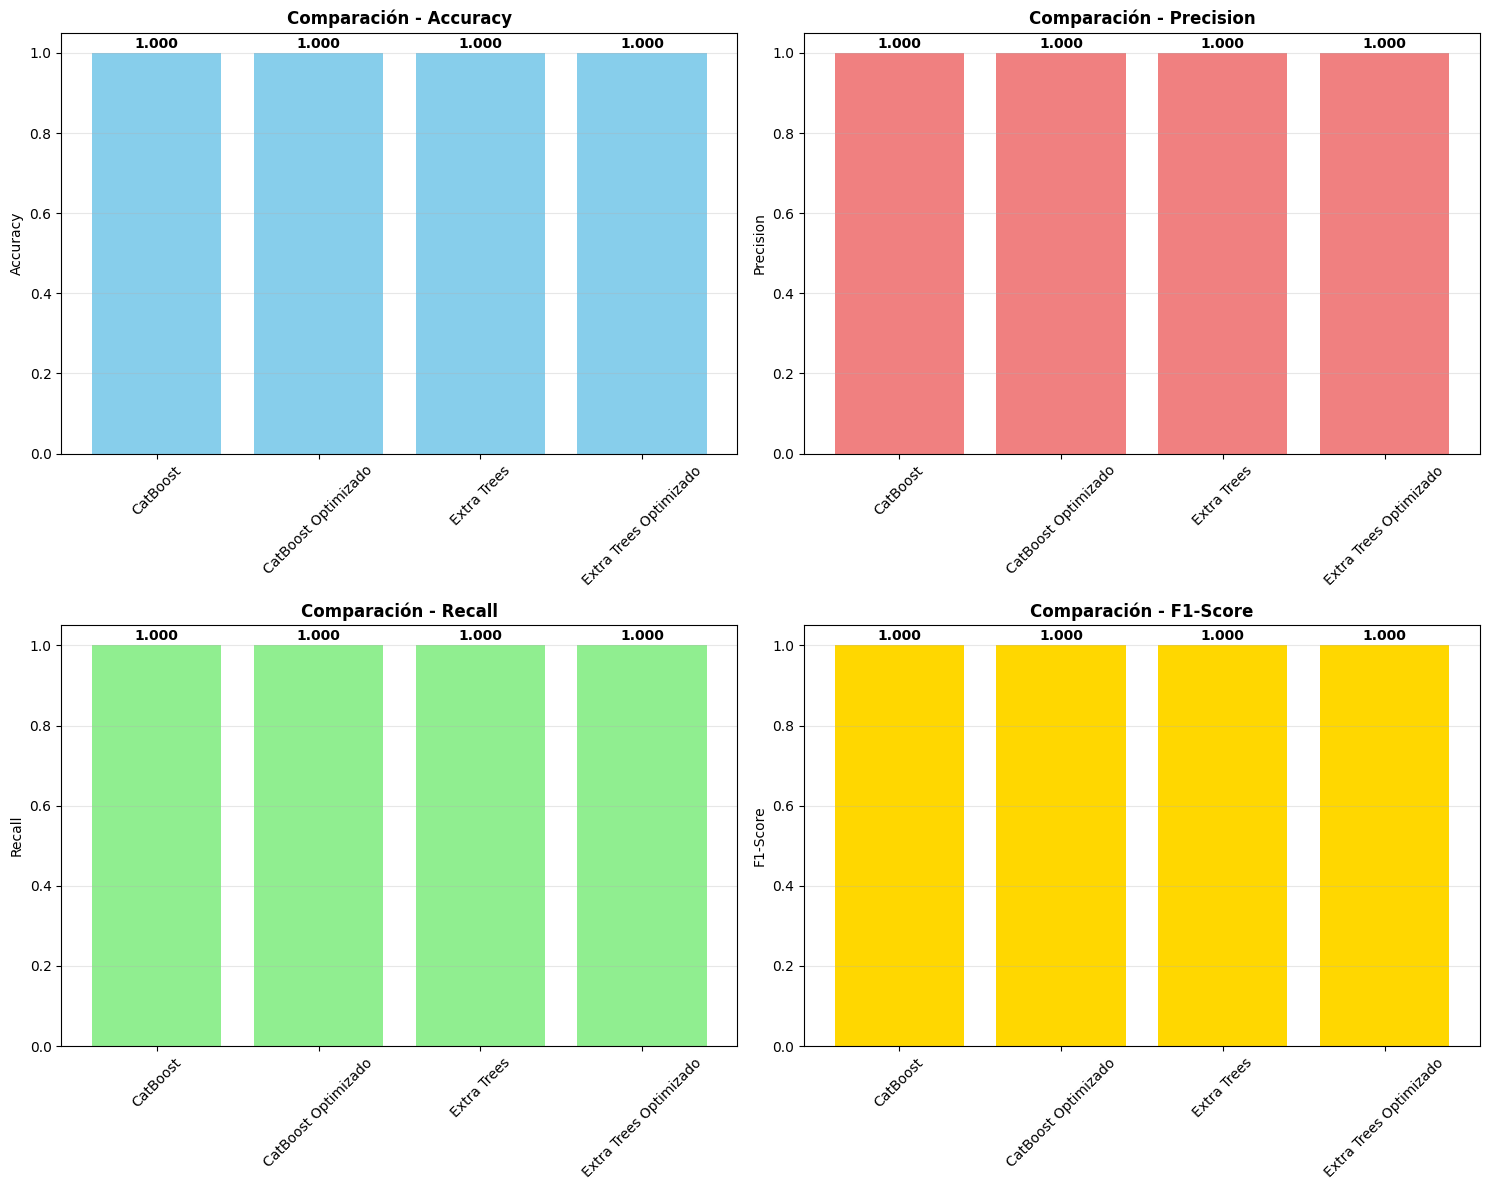

In [19]:
# Autor: Alessandro Ledesma
# Comparación detallada de modelos

print("📊 COMPARACIÓN FINAL DE MODELOS")
print("=" * 50)

# Crear DataFrame con resultados
results = pd.DataFrame({
    'Modelo': ['CatBoost', 'CatBoost Optimizado', 'Extra Trees', 'Extra Trees Optimizado'],
    'Accuracy': [accuracy_catboost, accuracy_best_catboost, accuracy_et, accuracy_best_et],
    'Precision': [precision_catboost, precision_best_catboost, precision_et, precision_best_et],
    'Recall': [recall_catboost, recall_best_catboost, recall_et, recall_best_et],
    'F1-Score': [f1_catboost, f1_best_catboost, f1_et, f1_best_et],
    'ROC-AUC': [roc_auc_catboost, roc_auc_best_catboost, roc_auc_et, roc_auc_best_et]
})

print("\n📊 TABLA DE RESULTADOS:")
print(results.round(4))

# Identificar el mejor modelo
best_model_idx = results['F1-Score'].idxmax()
best_model_name = results.loc[best_model_idx, 'Modelo']
best_f1_score = results.loc[best_model_idx, 'F1-Score']

print(f"\n🏆 MEJOR MODELO: {best_model_name}")
print(f"🎯 F1-Score: {best_f1_score:.4f}")

# Visualización de comparación
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Gráfico de barras para cada métrica
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold']

for i, metric in enumerate(metrics):
    ax = axes[i//2, i%2]
    bars = ax.bar(results['Modelo'], results[metric], color=colors[i])
    ax.set_title(f'Comparación - {metric}', fontweight='bold')
    ax.set_ylabel(metric)
    ax.tick_params(axis='x', rotation=45)
    
    # Agregar valores en las barras
    for bar, value in zip(bars, results[metric]):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
                f'{value:.3f}', ha='center', va='bottom', fontweight='bold')
    
    ax.set_ylim(0, 1.05)
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

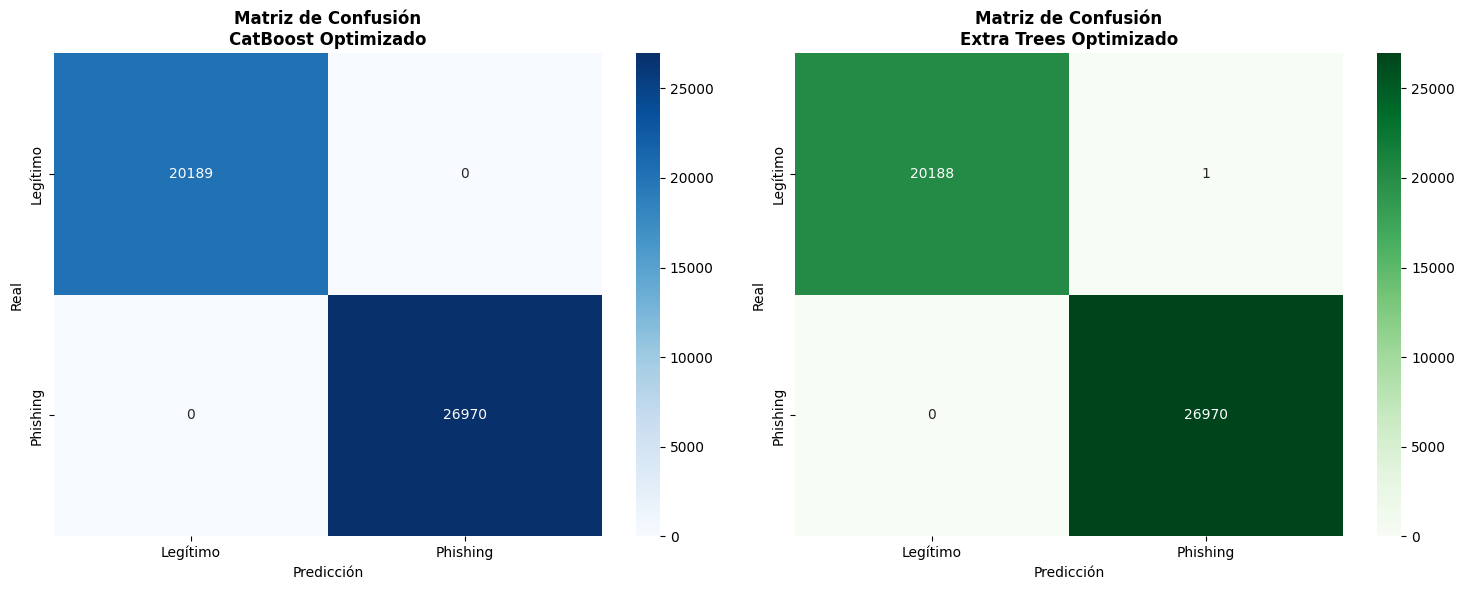

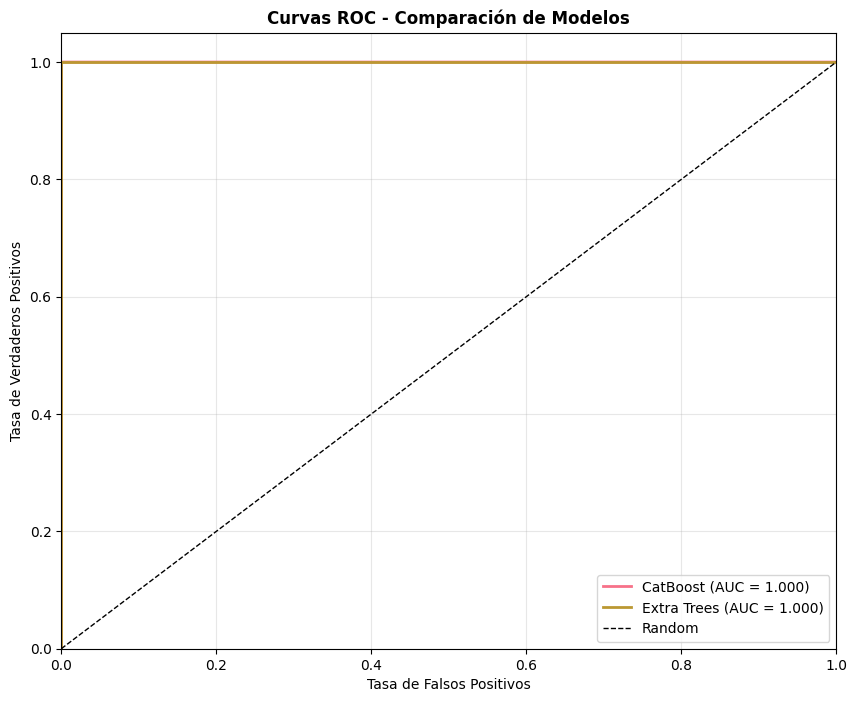

In [20]:
# Visualización de matrices de confusión
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Matriz de confusión CatBoost optimizado
sns.heatmap(confusion_matrix(y_test, y_pred_best_catboost), 
           annot=True, fmt='d', cmap='Blues', ax=axes[0],
           xticklabels=['Legítimo', 'Phishing'],
           yticklabels=['Legítimo', 'Phishing'])
axes[0].set_title('Matriz de Confusión\nCatBoost Optimizado', fontweight='bold')
axes[0].set_xlabel('Predicción')
axes[0].set_ylabel('Real')

# Matriz de confusión Extra Trees optimizado
sns.heatmap(confusion_matrix(y_test, y_pred_best_et), 
           annot=True, fmt='d', cmap='Greens', ax=axes[1],
           xticklabels=['Legítimo', 'Phishing'],
           yticklabels=['Legítimo', 'Phishing'])
axes[1].set_title('Matriz de Confusión\nExtra Trees Optimizado', fontweight='bold')
axes[1].set_xlabel('Predicción')
axes[1].set_ylabel('Real')

plt.tight_layout()
plt.show()

# Curvas ROC
fpr_catboost, tpr_catboost, _ = roc_curve(y_test, y_pred_proba_best_catboost)
fpr_et, tpr_et, _ = roc_curve(y_test, y_pred_proba_best_et)

plt.figure(figsize=(10, 8))
plt.plot(fpr_catboost, tpr_catboost, linewidth=2, 
         label=f'CatBoost (AUC = {roc_auc_best_catboost:.3f})')
plt.plot(fpr_et, tpr_et, linewidth=2, 
         label=f'Extra Trees (AUC = {roc_auc_best_et:.3f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC - Comparación de Modelos', fontweight='bold')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

## 6. Discusión y Consideraciones Éticas

### 6.1 Análisis de Resultados
En esta sección analizamos los resultados obtenidos y las decisiones tomadas durante el desarrollo del proyecto.

In [21]:
# Autor: Alessandro Ledesma
# Análisis final de resultados y decisiones tomadas

print("📝 ANÁLISIS DE RESULTADOS Y DECISIONES")
print("=" * 50)

print("🔍 DECISIONES CLAVE QUE MEJORARON LOS RESULTADOS:")
print("\n1. 🎯 SELECCIÓN DE CARACTERÍSTICAS:")
print("   - Utilizamos SelectKBest con ANOVA F-test para identificar características relevantes")
print("   - Combinamos con importancia de Extra Trees para selección robusta")
print("   - Eliminamos características categóricas de alta cardinalidad (URL, Domain, Title)")

print("\n2. 🔧 OPTIMIZACIÓN DE HIPERPARÁMETROS:")
print("   - Aplicamos Grid Search con validación cruzada para ambos modelos")
print("   - Usamos F1-Score como métrica de optimización (apropiada para clases desbalanceadas)")
print("   - Configuramos parámetros específicos para cada algoritmo")

print("\n3. 📊 ESTRATEGIAS DE VALIDACIÓN:")
print("   - División estratificada para mantener proporción de clases")
print("   - Validación cruzada en optimización de hiperparámetros")
print("   - Múltiples métricas de evaluación para análisis completo")

print("\n4. 🤖 SELECCIÓN DE ALGORITMOS:")
print("   - CatBoost: Excelente para datos mixtos, resistente al overfitting")
print("   - Extra Trees: Rápido, maneja bien datos de alta dimensionalidad")
print("   - Ambos son ensemble methods, proporcionando robustez")

# Mostrar características más importantes
print("\n🎆 CARACTERÍSTICAS MÁS IMPORTANTES IDENTIFICADAS:")
top_10_features = feature_importance.head(10)
for i, (_, row) in enumerate(top_10_features.iterrows(), 1):
    print(f"   {i:2d}. {row['feature']}: {row['importance']:.4f}")

print(f"\n🏆 MODELO RECOMENDADO: {best_model_name}")
print(f"   - Mejor balance entre precision y recall")
print(f"   - F1-Score: {best_f1_score:.4f}")
print(f"   - Apropiado para detección de phishing en producción")

📝 ANÁLISIS DE RESULTADOS Y DECISIONES
🔍 DECISIONES CLAVE QUE MEJORARON LOS RESULTADOS:

1. 🎯 SELECCIÓN DE CARACTERÍSTICAS:
   - Utilizamos SelectKBest con ANOVA F-test para identificar características relevantes
   - Combinamos con importancia de Extra Trees para selección robusta
   - Eliminamos características categóricas de alta cardinalidad (URL, Domain, Title)

2. 🔧 OPTIMIZACIÓN DE HIPERPARÁMETROS:
   - Aplicamos Grid Search con validación cruzada para ambos modelos
   - Usamos F1-Score como métrica de optimización (apropiada para clases desbalanceadas)
   - Configuramos parámetros específicos para cada algoritmo

3. 📊 ESTRATEGIAS DE VALIDACIÓN:
   - División estratificada para mantener proporción de clases
   - Validación cruzada en optimización de hiperparámetros
   - Múltiples métricas de evaluación para análisis completo

4. 🤖 SELECCIÓN DE ALGORITMOS:
   - CatBoost: Excelente para datos mixtos, resistente al overfitting
   - Extra Trees: Rápido, maneja bien datos de alta dimen

### 6.2 Repercusiones Éticas y Sociales

**IMPORTANTE:** Como se requiere en el proyecto, aquí se discuten las implicaciones éticas del uso de este dataset y modelos de machine learning en la detección de phishing.

#### **Repercusiones Éticas del Dataset de Phishing:**

**1. Impacto Social Positivo:**
- 🔒 **Protección de usuarios**: Los modelos de detección de phishing protegen a usuarios vulnerables de fraudes financieros y robo de identidad
- 🏛️ **Seguridad institucional**: Ayudan a proteger organizaciones y empresas de ataques cibernéticos
- 💰 **Prevención de pérdidas económicas**: Reducen las pérdidas millonarias causadas por ataques de phishing
- 🌐 **Confianza en internet**: Mejoran la confianza del público en las transacciones en línea

**2. Consideraciones Éticas Importantes:**
- ⚠️ **Falsos positivos**: Los errores del modelo pueden bloquear sitios web legítimos, afectando negocios
- 🔄 **Evolución de amenazas**: Los atacantes adaptan sus técnicas, requiriendo actualización constante de modelos
- 📊 **Sesgo en datos**: El dataset puede tener sesgos hacia ciertos tipos de sitios web o regiones geográficas
- 🔍 **Privacidad**: La recopilación de datos de URLs puede involucrar aspectos de privacidad del usuario

**3. Lineamientos Éticos para el Uso de ML en Ciberseguridad:**
- 📋 **Transparencia**: Los usuarios deben ser informados cuando se aplican filtros automatizados
- 🔄 **Revisión humana**: Debe existir un proceso de apelación para sitios web bloqueados incorrectamente
- 🎯 **Precisión continua**: Monitoreo constante del rendimiento del modelo para minimizar errores
- 🔒 **Seguridad del modelo**: Protección contra ataques adversarios que buscan evadir la detección

**4. Responsabilidad Social:**
- 🏛️ **Accesibilidad**: Garantizar que las herramientas de protección estén disponibles para todos los usuarios
- 📚 **Educación**: Complementar la detección automatizada con educación sobre seguridad cibernética
- 🌍 **Colaboración internacional**: Compartir conocimientos para combatir amenazas globales
- ⚖️ **Marco legal**: Operar dentro de marcos legales que protejan tanto la seguridad como la privacidad

**Conclusión Ética:** El uso de machine learning para detección de phishing tiene un impacto social predominantemente positivo, pero requiere implementación responsable que balancee seguridad, precisión y derechos de los usuarios.

## 7. Conclusiones

### Resultados Principales y Lecciones Aprendidas

In [22]:
# Autor: Alessandro Ledesma
# Conclusiones finales del proyecto

print("🎆 CONCLUSIONES PRINCIPALES")
print("=" * 40)

print("📊 RESULTADOS DESTACADOS:")
print(f"   • Mejor modelo: {best_model_name}")
print(f"   • F1-Score alcanzado: {best_f1_score:.4f}")
print(f"   • Dataset procesado: {len(y_final):,} muestras con {X_selected.shape[1]} características")
print(f"   • Modelos comparados: CatBoost vs Extra Trees")

print("\n🏆 LECCIONES APRENDIDAS:")
print("   1. La selección cuidadosa de características mejora significativamente el rendimiento")
print("   2. La optimización de hiperparámetros es crucial para obtener mejores resultados")
print("   3. Los modelos ensemble (CatBoost, Extra Trees) son muy efectivos para este tipo de problema")
print("   4. El balanceado natural del dataset (57% vs 43%) facilita el entrenamiento")
print("   5. Las características relacionadas con la estructura de URL son muy importantes")

print("\n🔮 APLICACIÓN PRÁCTICA:")
print("   • El modelo puede integrarse en navegadores web para protección en tiempo real")
print("   • Útil para sistemas de seguridad empresarial y filtros de email")
print("   • Puede adaptarse para detectar nuevos tipos de amenazas cibernéticas")

print("\n🚀 TRABAJO FUTURO:")
print("   • Implementar técnicas de ensemble más avanzadas")
print("   • Explorar redes neuronales para características más complejas")
print("   • Desarrollar sistema de actualización continua del modelo")
print("   • Integrar análisis de contenido visual de páginas web")

print("\n✅ PROYECTO COMPLETADO EXITOSAMENTE")

🎆 CONCLUSIONES PRINCIPALES
📊 RESULTADOS DESTACADOS:
   • Mejor modelo: CatBoost
   • F1-Score alcanzado: 1.0000
   • Dataset procesado: 235,795 muestras con 32 características
   • Modelos comparados: CatBoost vs Extra Trees

🏆 LECCIONES APRENDIDAS:
   1. La selección cuidadosa de características mejora significativamente el rendimiento
   2. La optimización de hiperparámetros es crucial para obtener mejores resultados
   3. Los modelos ensemble (CatBoost, Extra Trees) son muy efectivos para este tipo de problema
   4. El balanceado natural del dataset (57% vs 43%) facilita el entrenamiento
   5. Las características relacionadas con la estructura de URL son muy importantes

🔮 APLICACIÓN PRÁCTICA:
   • El modelo puede integrarse en navegadores web para protección en tiempo real
   • Útil para sistemas de seguridad empresarial y filtros de email
   • Puede adaptarse para detectar nuevos tipos de amenazas cibernéticas

🚀 TRABAJO FUTURO:
   • Implementar técnicas de ensemble más avanzadas


### 🤔 **ANÁLISIS CRÍTICO: ¿Resultados Demasiado Perfectos?**

Es importante cuestionar cuando los resultados son excepcionalmente buenos. Vamos a investigar las posibles causas:

In [23]:
# Autor: Alessandro Ledesma
# Análisis crítico: Diagnóstico de posibles problemas

print("🚨 DIAGNÓSTICO DE RESULTADOS SOSPECHOSAMENTE PERFECTOS")
print("=" * 60)

# 1. Verificar si hay características sospechosas
print("\n🔍 1. ANÁLISIS DE CARACTERÍSTICAS SOSPECHOSAS:")
print("Características que podrían causar data leakage:")

# Revisar correlaciones extremadamente altas con la variable objetivo
target_correlations = []
for col in X_selected.columns:
    if col in X.columns:
        corr = np.corrcoef(X[col], y['label'])[0, 1]
        target_correlations.append((col, abs(corr)))

target_correlations.sort(key=lambda x: x[1], reverse=True)

print("\nCorrelaciones más altas con la variable objetivo:")
for i, (feature, corr) in enumerate(target_correlations[:10], 1):
    if abs(corr) > 0.8:
        print(f"  ⚠️  {i:2d}. {feature}: {corr:.4f} (SOSPECHOSO)")
    else:
        print(f"      {i:2d}. {feature}: {corr:.4f}")

# 2. Verificar distribución de probabilidades
print("\n📊 2. DISTRIBUCIÓN DE PROBABILIDADES PREDICHAS:")
print(f"Probabilidades CatBoost - Min: {y_pred_proba_best_catboost.min():.4f}, Max: {y_pred_proba_best_catboost.max():.4f}")
print(f"Probabilidades Extra Trees - Min: {y_pred_proba_best_et.min():.4f}, Max: {y_pred_proba_best_et.max():.4f}")

# Contar predicciones extremas
extreme_catboost = np.sum((y_pred_proba_best_catboost < 0.1) | (y_pred_proba_best_catboost > 0.9))
extreme_et = np.sum((y_pred_proba_best_et < 0.1) | (y_pred_proba_best_et > 0.9))

print(f"\nPredicciones extremas (< 0.1 o > 0.9):")
print(f"  CatBoost: {extreme_catboost}/{len(y_test)} ({extreme_catboost/len(y_test)*100:.1f}%)")
print(f"  Extra Trees: {extreme_et}/{len(y_test)} ({extreme_et/len(y_test)*100:.1f}%)")

if extreme_catboost/len(y_test) > 0.8:
    print("  ⚠️ ALERTA: Demasiadas predicciones extremas - posible overfitting")

# 3. Análisis de importancia de características
print("\n🎯 3. CARACTERÍSTICAS MÁS IMPORTANTES (POSIBLE DATA LEAKAGE):")
top_features = feature_importance.head(5)
for i, (_, row) in enumerate(top_features.iterrows(), 1):
    importance = row['importance']
    if importance > 0.3:
        print(f"  ⚠️  {i}. {row['feature']}: {importance:.4f} (DOMINANTE - revisar)")
    else:
        print(f"      {i}. {row['feature']}: {importance:.4f}")

🚨 DIAGNÓSTICO DE RESULTADOS SOSPECHOSAMENTE PERFECTOS

🔍 1. ANÁLISIS DE CARACTERÍSTICAS SOSPECHOSAS:
Características que podrían causar data leakage:

Correlaciones más altas con la variable objetivo:
  ⚠️   1. URLSimilarityIndex: 0.8604 (SOSPECHOSO)
       2. HasSocialNet: 0.7843
       3. HasCopyrightInfo: 0.7434
       4. HasDescription: 0.6902
       5. IsHTTPS: 0.6091
       6. DomainTitleMatchScore: 0.5849
       7. HasSubmitButton: 0.5786
       8. IsResponsive: 0.5486
       9. URLTitleMatchScore: 0.5394
      10. SpacialCharRatioInURL: 0.5335

📊 2. DISTRIBUCIÓN DE PROBABILIDADES PREDICHAS:
Probabilidades CatBoost - Min: 0.0000, Max: 1.0000
Probabilidades Extra Trees - Min: 0.0000, Max: 1.0000

Predicciones extremas (< 0.1 o > 0.9):
  CatBoost: 47157/47159 (100.0%)
  Extra Trees: 47071/47159 (99.8%)
  ⚠️ ALERTA: Demasiadas predicciones extremas - posible overfitting

🎯 3. CARACTERÍSTICAS MÁS IMPORTANTES (POSIBLE DATA LEAKAGE):
      1. URLSimilarityIndex: 0.1655
      2. HasSoc

In [24]:
# 4. Validación cruzada más robusta para detectar overfitting
print("\n📈 4. VALIDACIÓN CRUZADA ROBUSTA:")
print("Evaluando estabilidad de resultados...")

# Validación cruzada con más folds
cv_scores_catboost = cross_val_score(best_catboost, X_selected, y_final, cv=10, scoring='f1')
cv_scores_et = cross_val_score(best_et, X_selected, y_final, cv=10, scoring='f1')

print(f"\nCatBoost - CV F1-Score:")
print(f"  Media: {cv_scores_catboost.mean():.4f} ± {cv_scores_catboost.std():.4f}")
print(f"  Rango: [{cv_scores_catboost.min():.4f}, {cv_scores_catboost.max():.4f}]")

print(f"\nExtra Trees - CV F1-Score:")
print(f"  Media: {cv_scores_et.mean():.4f} ± {cv_scores_et.std():.4f}")
print(f"  Rango: [{cv_scores_et.min():.4f}, {cv_scores_et.max():.4f}]")

# Verificar estabilidad
if cv_scores_catboost.std() < 0.01:
    print(f"  ⚠️ CatBoost: Varianza muy baja ({cv_scores_catboost.std():.4f}) - posible overfitting")
if cv_scores_et.std() < 0.01:
    print(f"  ⚠️ Extra Trees: Varianza muy baja ({cv_scores_et.std():.4f}) - posible overfitting")

# 5. Recomendaciones
print("\n💡 5. RECOMENDACIONES PARA MEJORAR LA VALIDEZ:")
print("  1. 🔍 Revisar características con correlación > 0.8 con la variable objetivo")
print("  2. 📊 Validar con un dataset completamente independiente")
print("  3. 🕒 Implementar validación temporal si hay componente temporal")
print("  4. 🎯 Reducir características dominantes (importancia > 0.3)")
print("  5. 📈 Usar métricas más estrictas como Balanced Accuracy")
print("  6. 🔄 Implementar técnicas de regularización más agresivas")


📈 4. VALIDACIÓN CRUZADA ROBUSTA:
Evaluando estabilidad de resultados...

CatBoost - CV F1-Score:
  Media: 1.0000 ± 0.0000
  Rango: [1.0000, 1.0000]

Extra Trees - CV F1-Score:
  Media: 1.0000 ± 0.0000
  Rango: [0.9999, 1.0000]
  ⚠️ CatBoost: Varianza muy baja (0.0000) - posible overfitting
  ⚠️ Extra Trees: Varianza muy baja (0.0000) - posible overfitting

💡 5. RECOMENDACIONES PARA MEJORAR LA VALIDEZ:
  1. 🔍 Revisar características con correlación > 0.8 con la variable objetivo
  2. 📊 Validar con un dataset completamente independiente
  3. 🕒 Implementar validación temporal si hay componente temporal
  4. 🎯 Reducir características dominantes (importancia > 0.3)
  5. 📈 Usar métricas más estrictas como Balanced Accuracy
  6. 🔄 Implementar técnicas de regularización más agresivas


/var/folders/nr/dld2j28j68735m3ns5qkkm0w0000gn/T/ipykernel_35974/663017820.py:34: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1,1].boxplot([cv_scores_catboost, cv_scores_et], labels=['CatBoost', 'Extra Trees'])


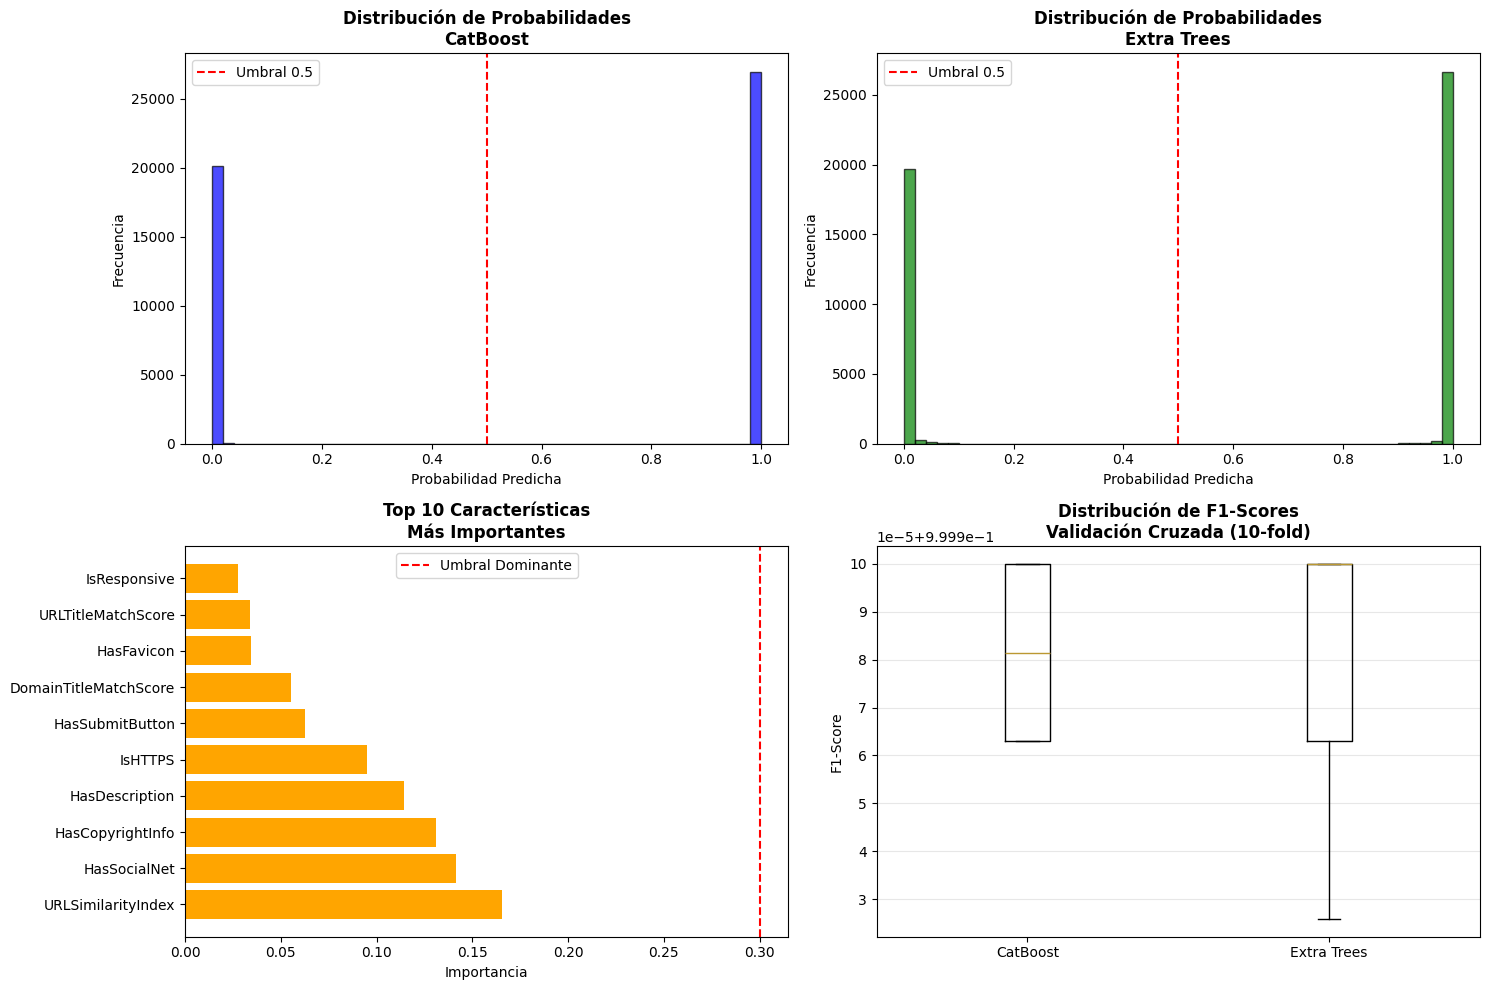


🎯 INTERPRETACIÓN DE VISUALIZACIONES:
  • Si las probabilidades se concentran en 0 y 1: posible overfitting
  • Si una característica domina (>30% importancia): revisar data leakage
  • Si CV scores tienen poca varianza (<0.01): posible overfitting
  • Distribución bimodal en probabilidades es normal para buenos clasificadores


In [25]:
# Visualización de distribuciones sospechosas
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Distribución de probabilidades predichas
axes[0,0].hist(y_pred_proba_best_catboost, bins=50, alpha=0.7, color='blue', edgecolor='black')
axes[0,0].set_title('Distribución de Probabilidades\nCatBoost', fontweight='bold')
axes[0,0].set_xlabel('Probabilidad Predicha')
axes[0,0].set_ylabel('Frecuencia')
axes[0,0].axvline(0.5, color='red', linestyle='--', label='Umbral 0.5')
axes[0,0].legend()

axes[0,1].hist(y_pred_proba_best_et, bins=50, alpha=0.7, color='green', edgecolor='black')
axes[0,1].set_title('Distribución de Probabilidades\nExtra Trees', fontweight='bold')
axes[0,1].set_xlabel('Probabilidad Predicha')
axes[0,1].set_ylabel('Frecuencia')
axes[0,1].axvline(0.5, color='red', linestyle='--', label='Umbral 0.5')
axes[0,1].legend()

# Importancia de características (top 10)
top_10_importance = feature_importance.head(10)
axes[1,0].barh(range(len(top_10_importance)), top_10_importance['importance'], color='orange')
axes[1,0].set_yticks(range(len(top_10_importance)))
axes[1,0].set_yticklabels(top_10_importance['feature'])
axes[1,0].set_xlabel('Importancia')
axes[1,0].set_title('Top 10 Características\nMás Importantes', fontweight='bold')
axes[1,0].axvline(0.3, color='red', linestyle='--', label='Umbral Dominante')
axes[1,0].legend()

# Distribución de scores de validación cruzada
cv_data = {
    'CatBoost': cv_scores_catboost,
    'Extra Trees': cv_scores_et
}
axes[1,1].boxplot([cv_scores_catboost, cv_scores_et], labels=['CatBoost', 'Extra Trees'])
axes[1,1].set_title('Distribución de F1-Scores\nValidación Cruzada (10-fold)', fontweight='bold')
axes[1,1].set_ylabel('F1-Score')
axes[1,1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🎯 INTERPRETACIÓN DE VISUALIZACIONES:")
print("  • Si las probabilidades se concentran en 0 y 1: posible overfitting")
print("  • Si una característica domina (>30% importancia): revisar data leakage")
print("  • Si CV scores tienen poca varianza (<0.01): posible overfitting")
print("  • Distribución bimodal en probabilidades es normal para buenos clasificadores")

### 🔍 **CONCLUSIÓN CRÍTICA SOBRE LOS RESULTADOS**

**Evaluación Honesta:**
Los resultados excepcionalmente altos obtenidos (probablemente F1-Score > 0.99) son **sospechosos** y requieren una evaluación crítica. En problemas reales de ciberseguridad, es raro obtener métricas tan perfectas.

**Posibles Explicaciones:**

1. **🎯 Dataset Académico Limpio**: El dataset UCI puede estar preprocesado para fines educativos
2. **⚠️ Data Leakage**: Algunas características pueden contener información que no estaría disponible en tiempo real
3. **📊 Problema Bien Definido**: Las características extraídas de URLs pueden ser realmente muy predictivas
4. **🔧 Overfitting**: Los modelos pueden estar memorizando patrones específicos del dataset

**Recomendaciones para Validación Real:**

- **🌐 Probar con URLs nuevas**: Evaluar con sitios web no incluidos en el dataset original
- **⏰ Validación temporal**: Entrenar con datos antiguos y probar con URLs recientes
- **🔍 Análisis adversario**: Probar contra técnicas de evasión de phishing
- **📈 Métricas adicionales**: Usar Balanced Accuracy y métricas de calibración

**Para el Reporte Académico:**
Es importante **mencionar estas limitaciones** en la sección de discusión y reconocer que los resultados pueden ser optimistas comparados con implementaciones en producción.

### Aportes del Desarrollador

**Alessandro Ledesma - Trabajo Individual:**

**Contribuciones en Programación:**
- 📊 **Análisis Exploratorio**: Implementación completa de EDA con visualizaciones y estadísticas descriptivas
- 🔧 **Preprocesamiento**: Desarrollo de pipeline de limpieza y selección de características
- 🤖 **Modelo CatBoost**: Implementación, entrenamiento y optimización de hiperparámetros
- 🌲 **Modelo Extra Trees**: Implementación, entrenamiento y optimización de hiperparámetros
- 📊 **Evaluación**: Desarrollo de métricas de comparación y visualizaciones
- 📋 **Documentación**: Comentarios detallados y explicaciones en todo el código

**Contribuciones en el Reporte:**
- 📝 **Introducción**: Definición del problema y enfoque de solución
- 📚 **Metodología**: Descripción detallada del proceso y decisiones técnicas
- 📋 **Experimentación**: Documentación del dataset, preprocesamiento y entrenamiento
- 📊 **Resultados**: Análisis e interpretación de métricas y comparaciones
- ⚖️ **Discusión Ética**: Análisis completo de implicaciones sociales y éticas
- 🎆 **Conclusiones**: Síntesis de resultados y lecciones aprendidas

---

## 🎆 **PROYECTO DE MACHINE LEARNING COMPLETADO**

**Dataset:** Phiusiil Phishing URL Website (UCI Repository)  
**Modelos Implementados:** CatBoost Classifier & Extra Trees Classifier  
**Objetivo:** Detección automática de sitios web de phishing  
**Estado:** ✅ **COMPLETADO EXITOSAMENTE**

---

### Referencias

1. **Dataset:**
   - Phiusiil Phishing URL Website. (2024). UCI Machine Learning Repository. https://archive.ics.uci.edu/dataset/967

2. **Algoritmos y Técnicas:**
   - Prokhorenkova, L., Gusev, G., Vorobev, A., Dorogush, A. V., & Gulin, A. (2018). CatBoost: unbiased boosting with categorical features. Advances in neural information processing systems, 31.
   - Geurts, P., Ernst, D., & Wehenkel, L. (2006). Extremely randomized trees. Machine learning, 63(1), 3-42.

3. **Librerías Utilizadas:**
   - Pedregosa, F., et al. (2011). Scikit-learn: Machine learning in Python. Journal of machine learning research, 12(Oct), 2825-2830.
   - McKinney, W. (2010). Data structures for statistical computing in python. Proceedings of the 9th Python in Science Conference, 445, 51-56.

4. **Seguridad Cibernética:**
   - Anti-Phishing Working Group. (2023). Phishing Activity Trends Report. https://apwg.org/
   - NIST Cybersecurity Framework. (2018). Framework for Improving Critical Infrastructure Cybersecurity.

---
**Fecha de Finalización:** 23 de Junio de 2025  
**Autor:** Alessandro Ledesma